# SWESARR Hackweek Project 2024

Group Members: Michelle, Evi, Nani, Dylan, Megan, Kehan, Mike, Elodie

In [1]:
import pandas as pd
from IPython.display import Image

# 1. Introduction

* The good, the bad and the ugly. Why we are so into radar?
* What are we trying to learn from SnowEx Grand Mesa airborne?

## The good, the bad and the ugly. Why we are so into radar?

> "The advantage of radar is the integration of the signal over the full thickness of the target, for example vegetation, soil, or snow. This disadvantage of radar is the integration of the signal over the full thickness of the target ...

-- Charles Elachi, via Jeff Dozier

### Radar has a path to space! 

The [Snow Globe](https://snowglobe.illinois.edu) satellite mission proposal is the latest in a series of satellite proposals to use radar to map globa snow water resources:


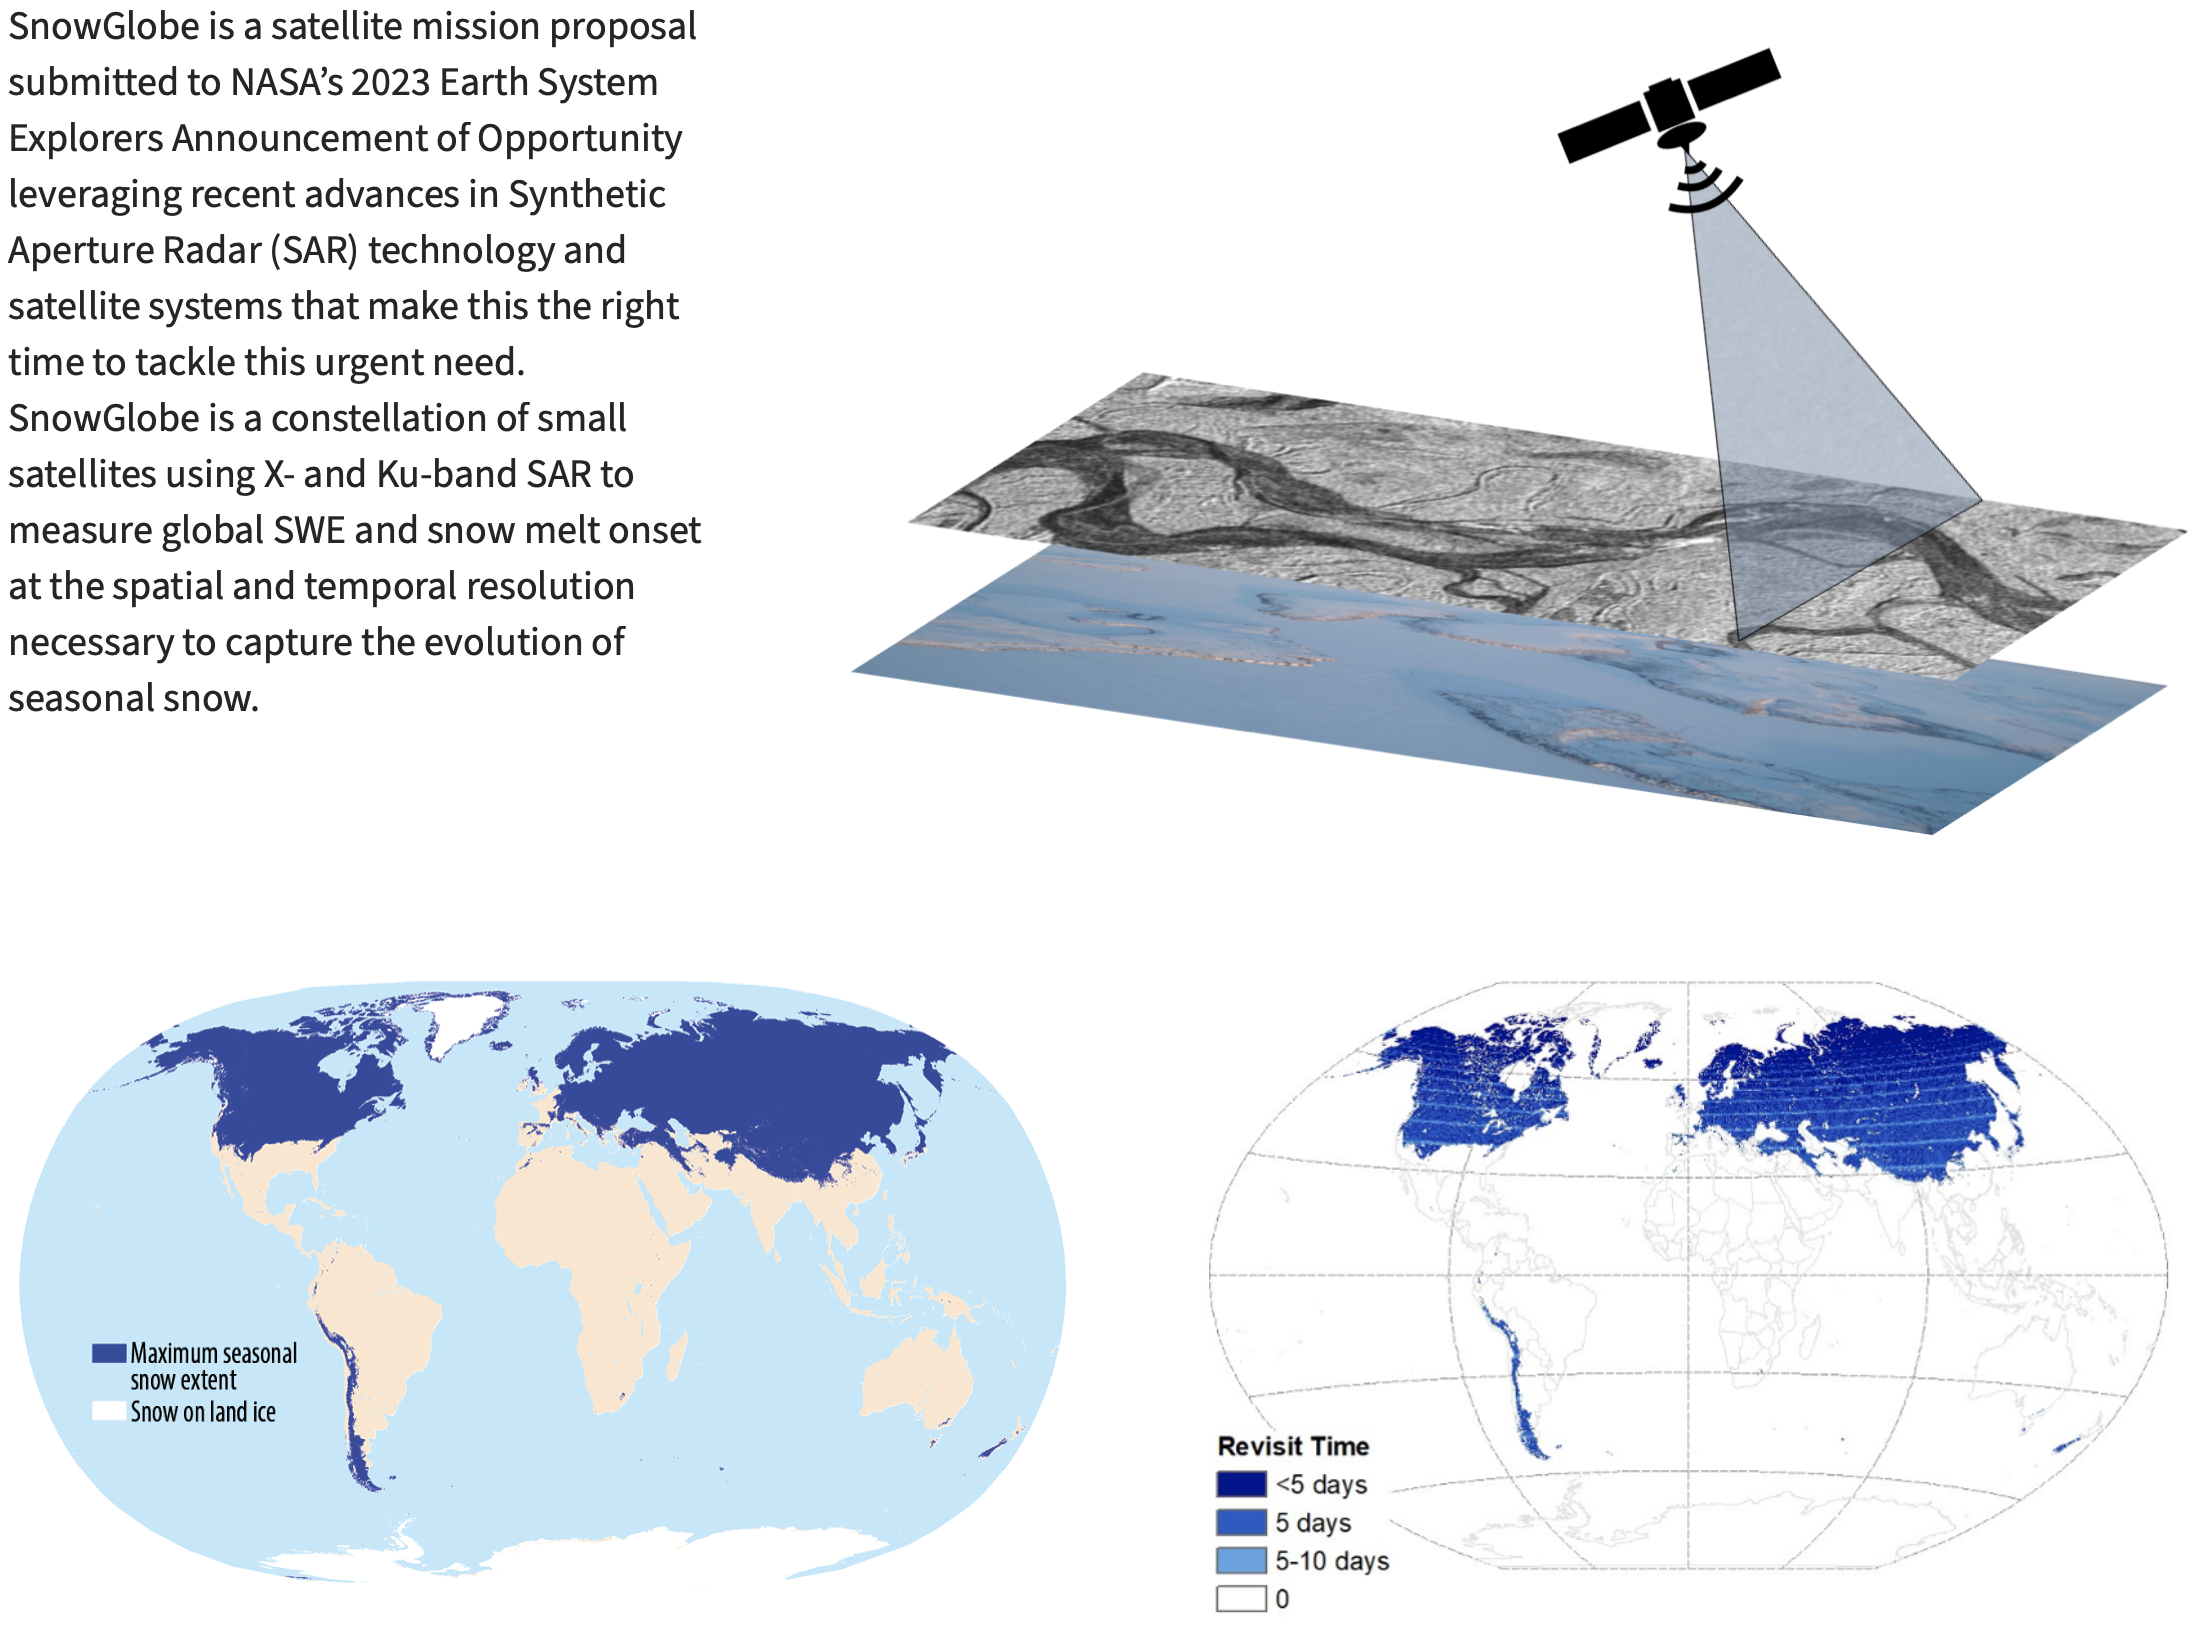

In [3]:
Image('figs/SnowGlobe.png')

### Status... :(

Sadly SnowGlobe was not selected. There are a history of about three other major satellite mission proposals not to be selected.

There are others in development! TSMM is a Canadian snow mission proposal that may well be selected in next six months. Fingers crossed!

## The technology: High-frequency radar remote sensing

These mission proposals use the intensity of radar backscatter (also known as the normalized radar cross section) which relies on microwave scattering. There's a [review paper](https://tc.copernicus.org/articles/16/3531/2022/) from a couple of years ago that reviews progress on these algorithms.

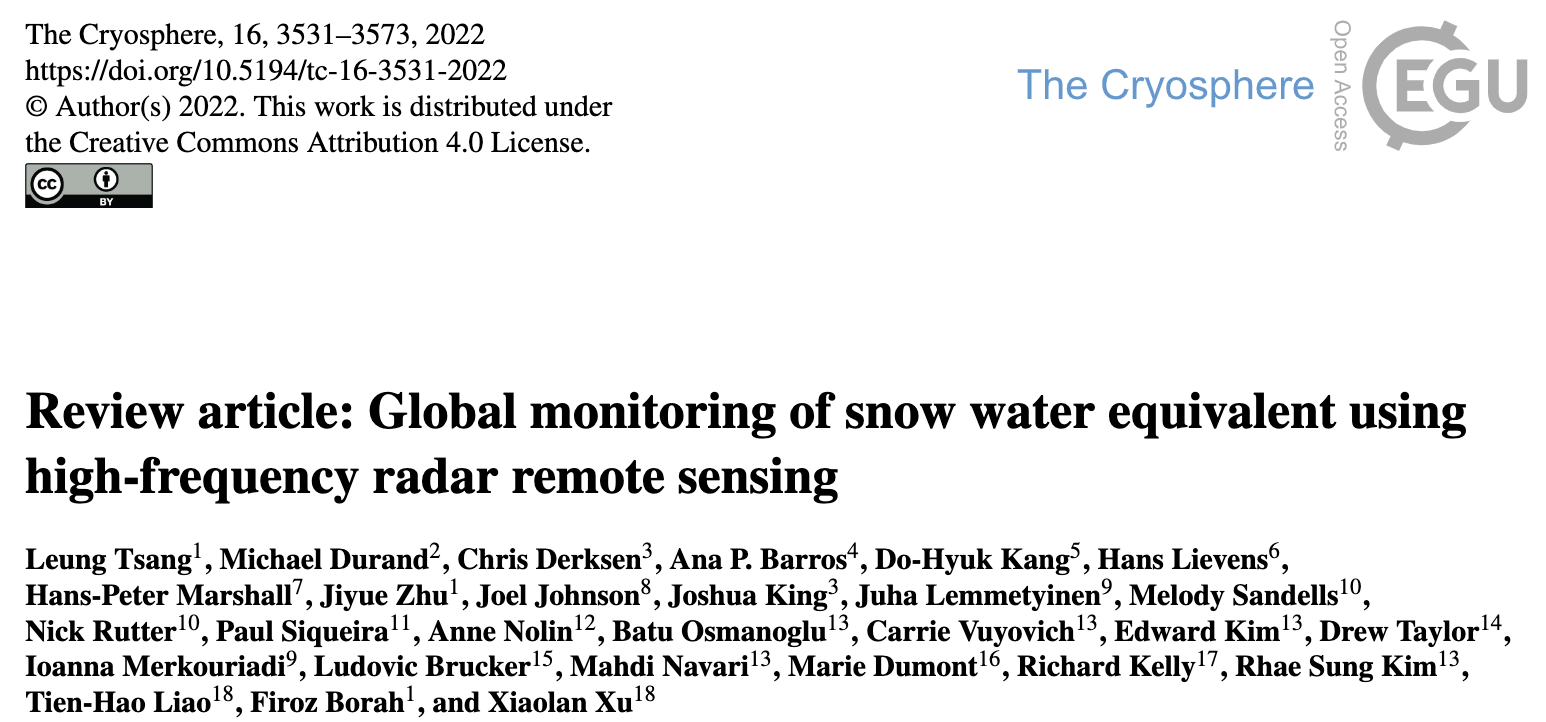

In [4]:
Image('figs/ReviewPaper.png')

### The upshot

Basically, it's like the Dozier-Elachi quote: radar integrates over soil and the depth of snow, as well as forest properties. Leaving the trees out of it for now, this means that both soils and snow play a role in determining the measured backscatter. This sketch shows the idea - it's from the team of an old mission proposal, [Rott et al. 2010](https://ieeexplore.ieee.org/document/5420000):

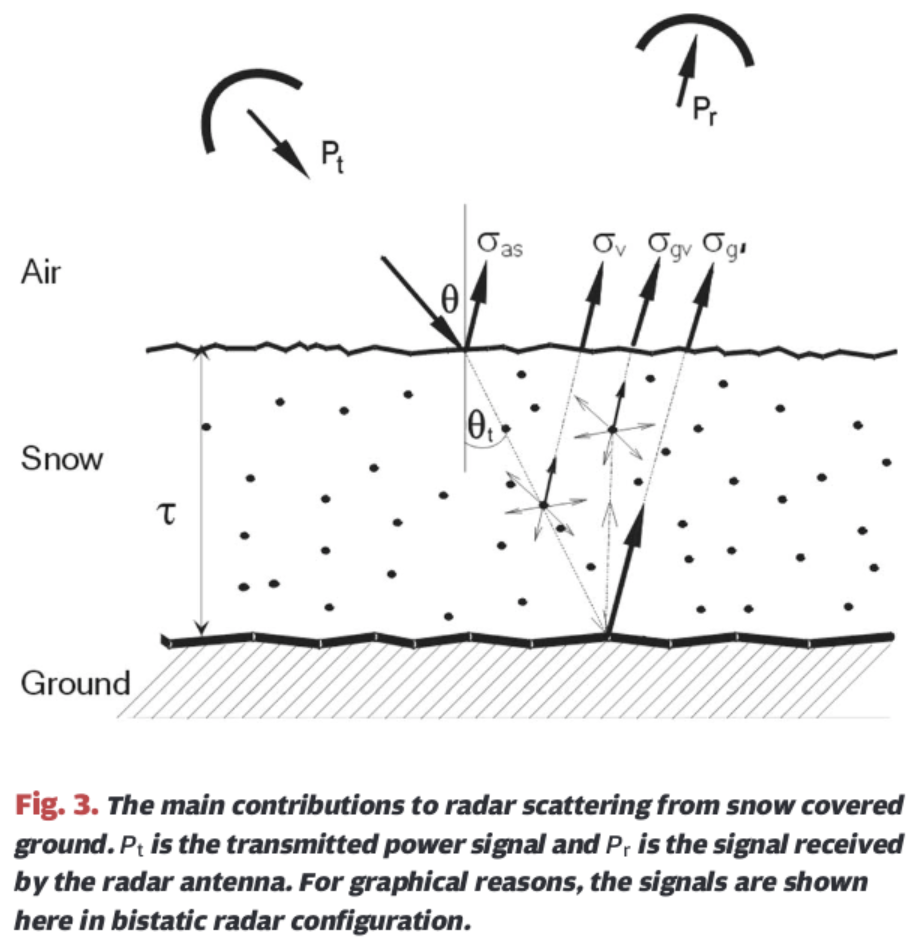

In [5]:
Image('figs/RadarContributions.png')

### The math version

You can go further and just show this as literally an additive effect: the observed backscatter is equal to the substrate/ground/soil backscatter + the snow volume backscatter. Here's a version of that from [Zhu et al. WRR 2021](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2020WR027563): 

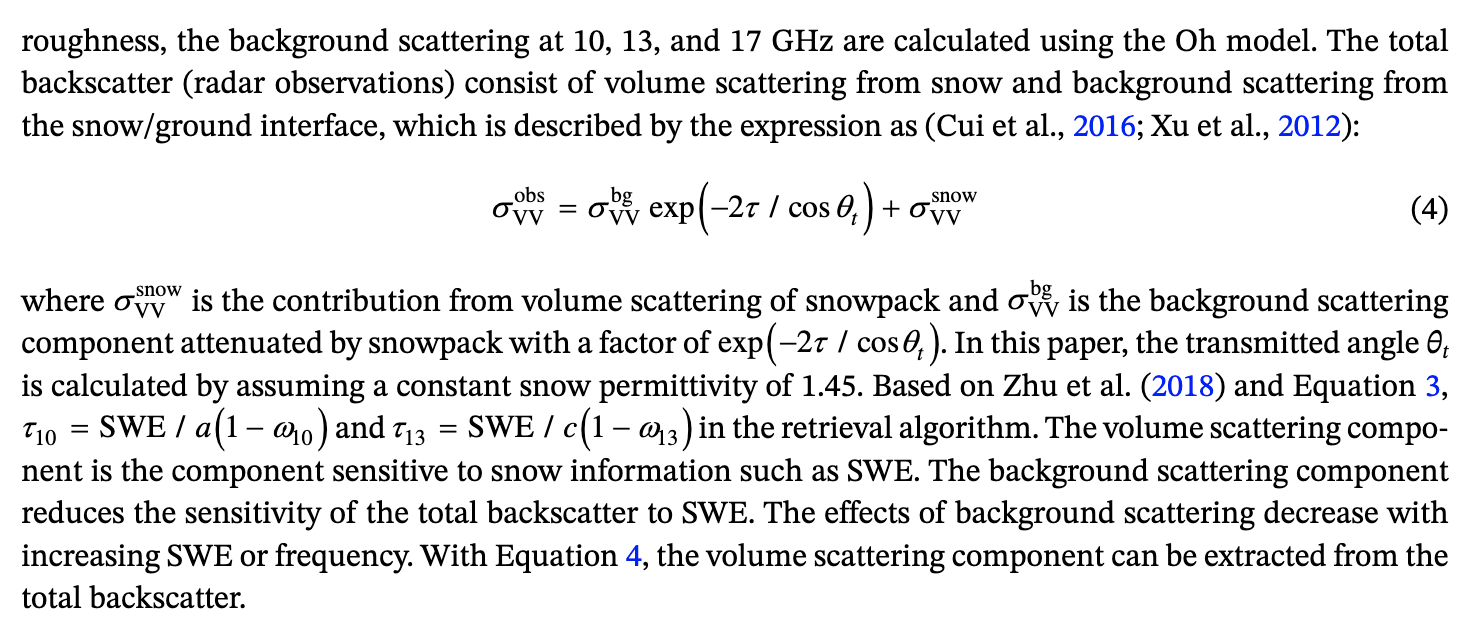

In [6]:
Image('figs/TheMaths.png')

The history of the algorithms to infer SWE from these measurements is a longer and more detailed story. Suffice to say they are at a moderate level of true proven accuracy, and need to significantly mature!

## How radar responds to snow and soil

These relationships are not simple. Some folks (most recently from Leung Tsang's group at U of M) have used simple representations of complex models:

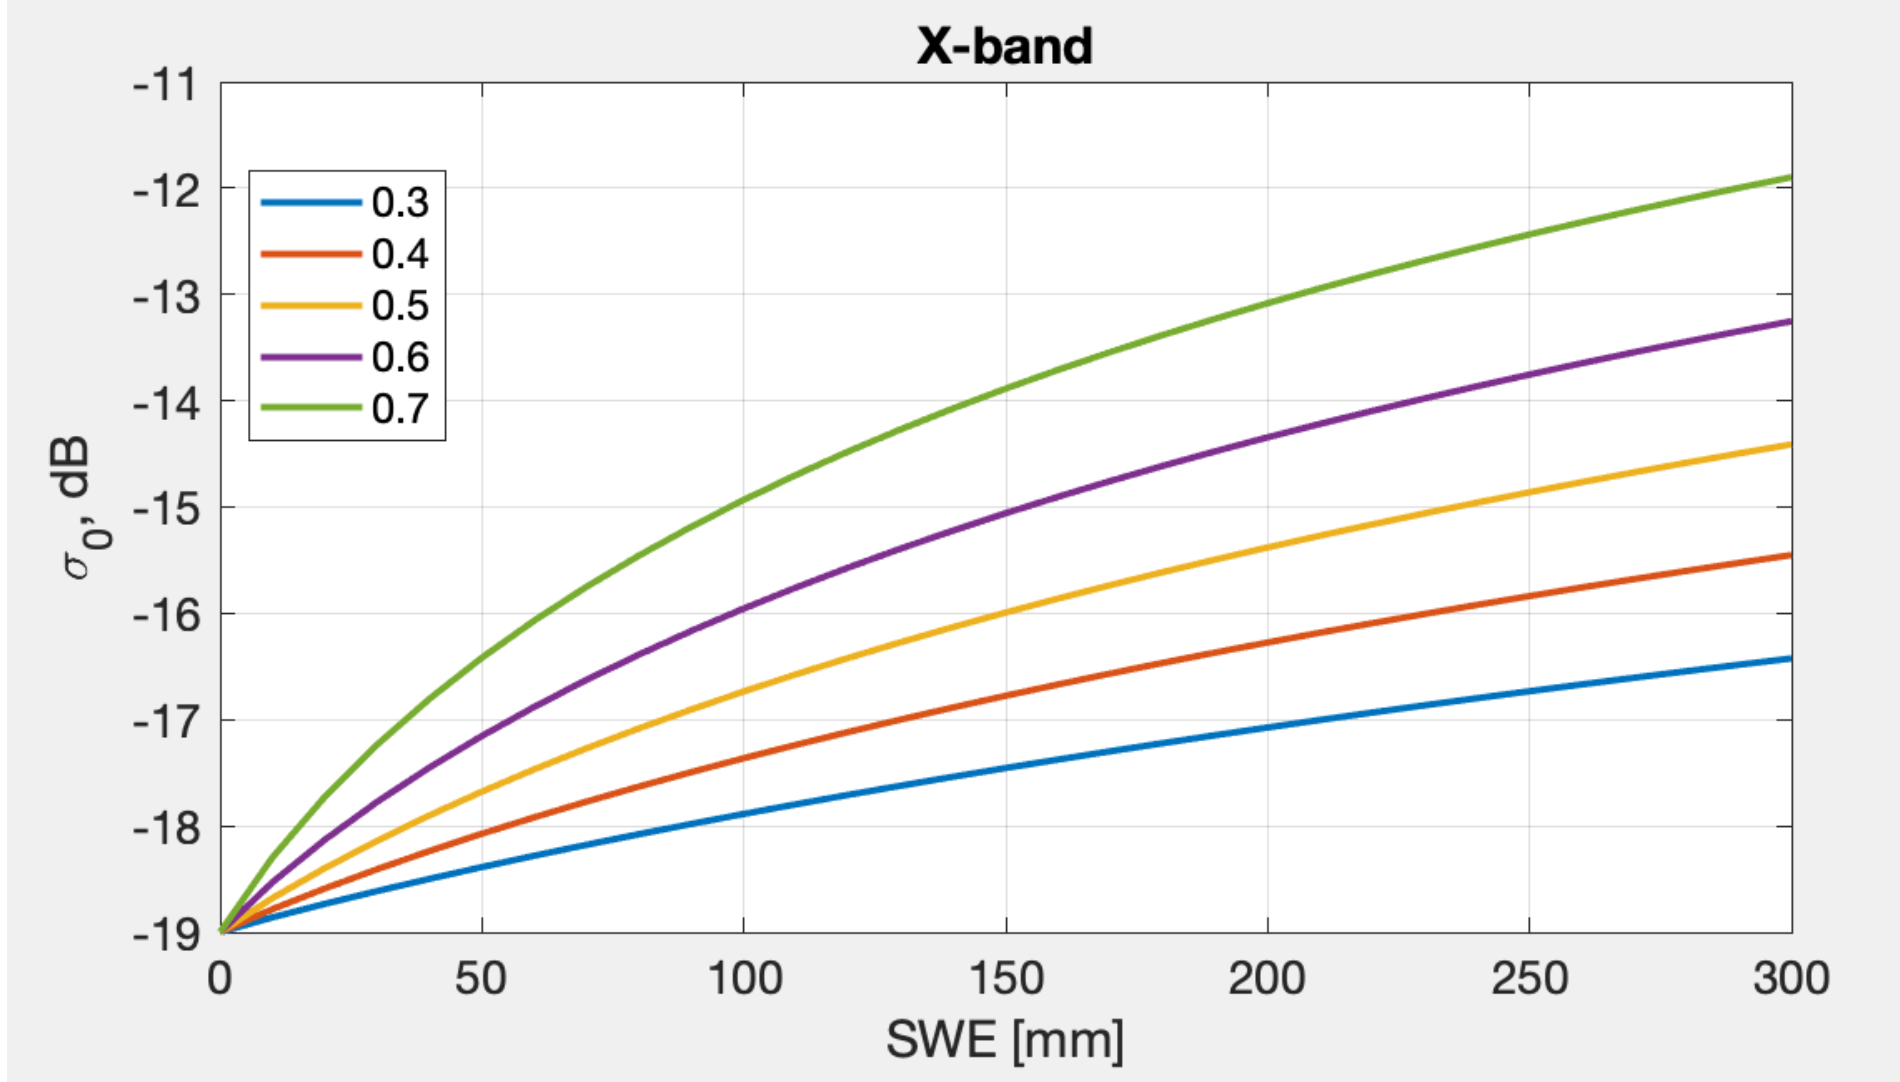

In [8]:
Image('figs/RadarResponseToSWE.png')

This shows traces of a simple model (see Zhu et al. paper linked above) and how backscatter increases with SWE at X-band for different values of microstructure.

What about soil? Here is a timeseries from tower-based radar data:

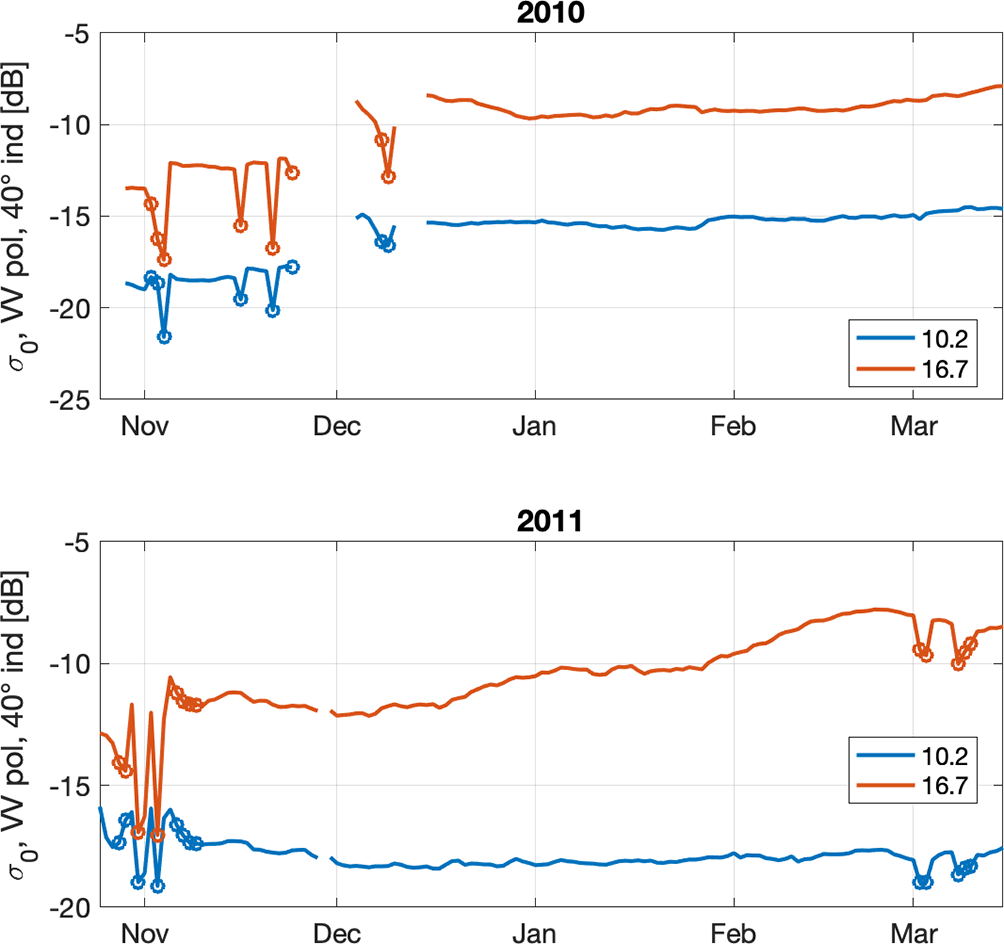

In [9]:
Image('figs/TowerTimeseries.png')

This figure is from [this paper in The Cryosphere](https://tc.copernicus.org/articles/18/139/2024/). Circles are those flagged as wet snow. The melt early in season leads to somewhat erratic changes. On these two years, the "dry low snow/snow off" date we picked was November 1 and November 20 for 2010 and 2011m respectively.

## Baby Steps! Airborne measurements to improve algorithm maturity

How do we avoid puting up a satellite up and ending up with the retrieved SWE being of poor accuracy? Many related efforts, but airborne campaigns are huge!

SnowEx 2020 Grand Mesa flew an airborne high frequency radar called 

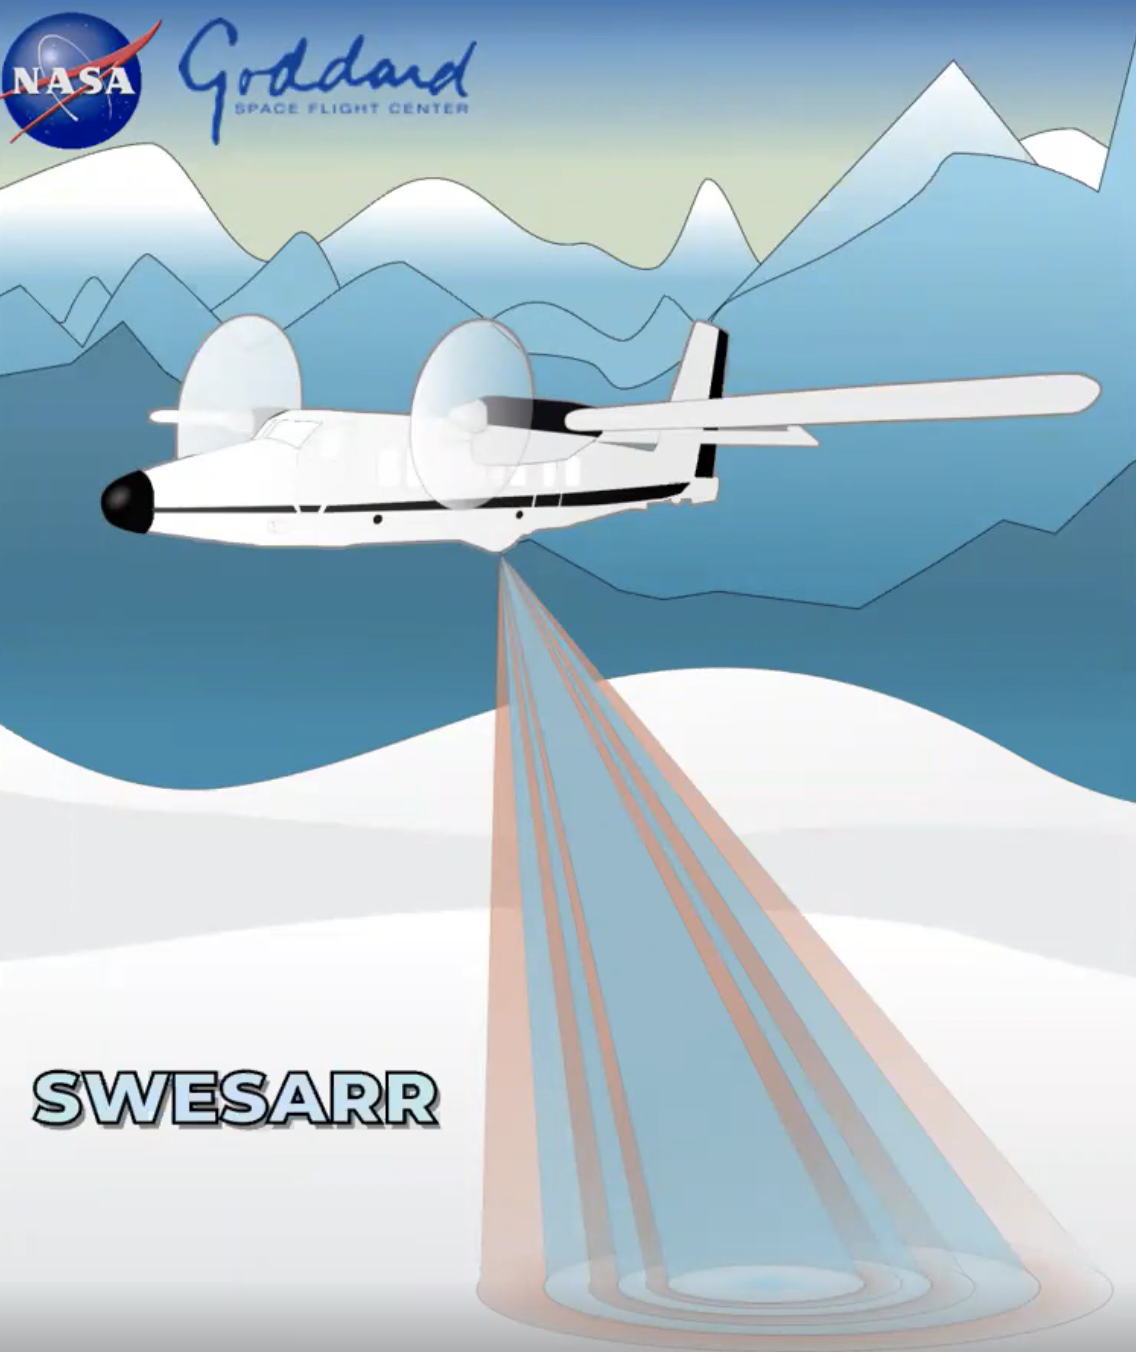

In [7]:
Image('figs/SWESARR.png')

What do we want from this campaign? My take is that we want to understand in the end how accurately the satellite retrieval will get SWE. And to get there, we should see how accurately we can retrieve SWE from SWESARR using really minimal assumptions applicable globally. And we should know why it has the accuracy it does.

Or that's where we need to get in the end. And along the way, we need to understand more or less everything we can about the substrate/soil, about the snow, and how they all play into the mesaured radar signal, and how that propagates into the retrieved SWE accuracy. 

Basically we want to know how accurately we can retrieve SWE, and why it isn't better haha. But!

### Context

We only have one of the three radar channels processed so far. This radar channel is the lowest frequency (~9 GHz X-band, ~30 mm wavelength), so it is MOSTLY responding to the soil.

We have it for ~2 km flight length. The swath width is ~500 m. 1 km^2! This area is ideal though. It's away from trees, has interesting geometrically identifiable targets (dry reservoirs) and LOTS of snow and soil data. There are targets where we know what the backscatter should be. And! We have both fall and November flights.

# 2. Goals and Questions

## General Goals...
* Retrieve SWE from SWESARR
* Gain experience with radar data
* Better understand the SWESARR radar measurements at Grand Mesa by comparing radar measurements with pretty much everything


## Musings and Ramlings

The fall flight is of great value no matter what.

However, it's really nice if you can isolate volume scattering by doing a modified subtraction of the fall and winter flight images. 

To do that, you want the fall image to more or less represent the substrate scattering during the winter. Thus you want:

## Strategy


## Specific Questions...


# 3. Algorithm and Methods

Evi and Mike

# 4. Data

1. Radar
2. In situ
   * **Snowpit** (Evi)
   * Autumn soil conditions (Megan)
   * Microstructure: **SSA** (Evi), CT (microstructure group), and SMP (Megan)
   * Photos (Megan)
3. Meteorology (Michelle)
4. Spatial
   * Lidar (Evi & Nani)
   * Sentinel (Kehan & Bareera)
   * GPR SWE (Kehan)
   * ASO SWE (Kehan & Bareera)
   * Land cover (Kehan)


In [24]:
# Timeline of SWESARR flights (Dylan & Mike)
# there are three days with flights in November, and two days with flights in February. Each day has two or three flights. Total flights is 13.
days=['2019-11-04','2019-11-05','2019-11-06','2020-02-11','2020-02-12']
nflights=[2,3,3,3,2]
dftimes=pd.DataFrame(data={'date':days,'flights':nflights})
dftimes

date  flights
0  2019-11-04        2
1  2019-11-05        3
2  2019-11-06        3
3  2020-02-11        3
4  2020-02-12        2

#### SWESARR TDBP Sample Data Information
Current SWESARR sample data is [available here](https://drive.google.com/drive/folders/11Pw__ldjfVBcd7o8sgoV3_5TaiSbQ0sh). The following dates and times can be used for this project.
| Folder                                      | Start_Date_UTC | Start_Time_UTC | End_Date_UTC | End_Time_UTC |
| ------------------------------------------- | -------------- | -------------- | ------------ | ------------ |
| GRMST1_27403_19004_017_191105_225_XX_01     | 11/5/2019      | 16:06:44       | 11/5/2019    | 16:07:17     |
| GRMST1_27702_20007_009_200211_225_XX_01     | 2/11/2020      | 17:25:18       | 2/11/2020    | 17:25:38     |
| GRMST1_27402_19003_013_191104_225_XX_01     | 11/4/2019      | 16:08:21       | 11/4/2019    | 16:08:54     |
| GRMST1_27401_19003_007_191104_225_XX_01     | 11/4/2019      | 15:32:05       | 11/4/2019    | 15:32:39     |
| GRMST1_27401_20007_005_200211_225_XX_01     | 2/11/2020      | 17:01:08       | 2/11/2020    | 17:01:41     |
| GRMST1_27403_19005_020_191106_225_XX_01     | 11/6/2019      | 16:02:53       | 11/6/2019    | 16:03:21     |
| GRMST1_27402_19004_011_191105_225_XX_01     | 11/5/2019      | 15:31:57       | 11/5/2019    | 15:32:28     |
| GRMST1_27402_19005_014_191106_225_XX_01     | 11/6/2019      | 15:23:09       | 11/6/2019    | 15:23:28     |
| GRMST1_27502_20008_025_200212_225_XX_01     | 2/12/2020      | 19:02:37       | 2/12/2020    | 19:03:11     |
| GRMST1_27403_20008_029_200212_225_XX_01     | 2/12/2020      | 19:26:28       | 2/12/2020    | 19:27:01     |
| GRMST1_27401_19004_005_191105_225_XX_01     | 11/5/2019      | 14:52:06       | 11/5/2019    | 14:52:39     |
| GRMST1_27503_20007_012_200211_225_XX_01     | 2/11/2020      | 17:50:04       | 2/11/2020    | 17:50:37     |
| GRMST1_27401_19005_008_191106_225_XX_01     | 11/6/2019      | 14:42:19       | 11/6/2019    | 14:42:52     |

# 5. Data exploration and comparison

This will evolve organic

1. Spatial and temporal radar patterns (Nani & Bareera)
2. Timeseries of met data and soil moisture (Michelle)
3. Snow depth patterns from Lidar (Nani and Evi)

# 6. Pulling algorithm inputs

* Radar (Dylan & Bareera [new to me but would like to learn,if possible]) 
* Other (Dylan)

# 7. Running algorithm
* Run! (Dylan)

# 8. Plotting algorithm output

Elodie & Mike

# 9. TBD what that means

# 10. Fin! What did we learn